## Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [2]:
startup_data=pd.read_csv('50_Startups.csv')
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Understanding:

In [3]:
startup_data.shape

(50, 5)

In [4]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
del startup_data['State']

In [9]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
startup_data.shape

(50, 4)

### Feature Transformtaion:

In [11]:
startup_data.rename({'R&D Spend':'Rd','Administration':'Ad','Marketing Spend':'Mk'},axis=1,inplace=True)
startup_data.head()

,Rd,Ad,Mk,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Correlation Matrix:

In [12]:
startup_data_corr=startup_data.corr().round(2)
startup_data_corr

,Rd,Ad,Mk,Profit
Rd,1.00,0.24,0.72,0.97
Ad,0.24,1.00,-0.03,0.20
Mk,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


<AxesSubplot:>

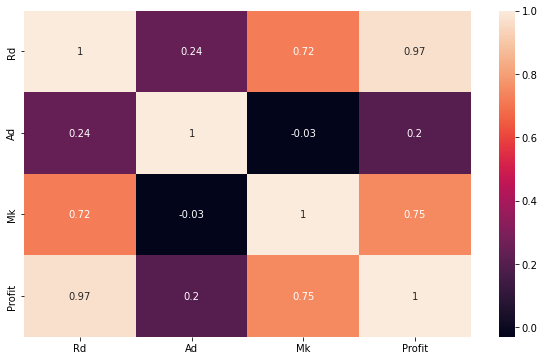

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(startup_data_corr,annot=True)

# Scatterplot between variables along with histograms

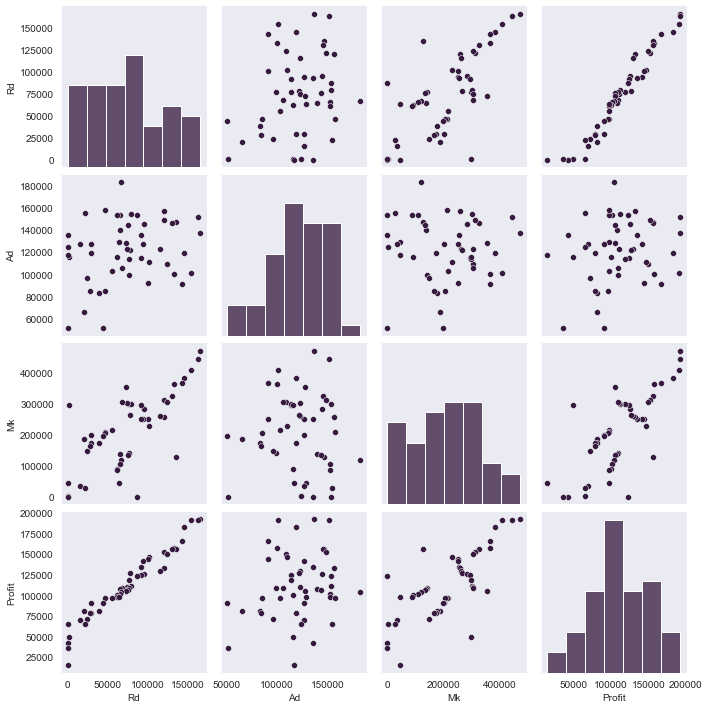

In [14]:
sns.set_palette('rocket')
sns.set_style(style='dark')
sns.pairplot(startup_data)

## Model Building || Model Training:

In [15]:
model=smf.ols('Profit~Rd+Ad+Mk',data=startup_data).fit()
model

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        17:54:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Rd             0.8057      0.045     17.846      0.000       0.715       0.897
Ad            -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mk             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.params

Intercept    50122.192990
Rd               0.805715
Ad              -0.026816
Mk               0.027228
dtype: float64

In [18]:
model.tvalues,model.pvalues.round(5)

(Intercept     7.626218
 Rd           17.846374
 Ad           -0.525507
 Mk            1.655077
 dtype: float64,
 Intercept    0.00000
 Rd           0.00000
 Ad           0.60176
 Mk           0.10472
 dtype: float64)

In [19]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

### Build SLR and MLR models for insignificant variables 'Ad' and 'Mk'
### Also find their tvalues and pvalues

In [20]:
slr_Ad=smf.ols('Profit~Ad',data=startup_data).fit()
slr_Ad.tvalues,slr_Ad.pvalues

(Intercept    3.040044
 Ad           1.419493
 dtype: float64,
 Intercept    0.003824
 Ad           0.162217
 dtype: float64)

In [21]:
slr_Mk=smf.ols('Profit~Mk',data=startup_data).fit()
slr_Mk.tvalues,slr_Mk.pvalues

(Intercept    7.808356
 Mk           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mk           4.381073e-10
 dtype: float64)

In [22]:
mlr_AdMk = smf.ols('Profit~Ad+Mk',data=startup_data).fit()
mlr_AdMk.tvalues,mlr_AdMk.pvalues

(Intercept    1.142741
 Ad           2.467779
 Mk           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Ad           1.729198e-02
 Mk           9.727245e-11
 dtype: float64)

## Model Validation Techniques:

## 1: Multicollinearity check:

In [23]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_Rd = smf.ols('Rd~Ad+Mk',data=startup_data).fit().rsquared
vif_Rd=1/(1-rsq_Rd)

rsq_Ad = smf.ols('Ad~Rd+Mk',data=startup_data).fit().rsquared
vif_Ad=1/(1-rsq_Ad)

rsq_Mk = smf.ols('Mk~Ad+Rd',data=startup_data).fit().rsquared
vif_Mk=1/(1-rsq_Mk)

#storing VIF values in dataframe:
d1={'Variables':['Rd','Ad','Mk'],'VIF':[vif_Rd,vif_Ad,vif_Mk]}
vif_dataframe=pd.DataFrame(d1)
vif_dataframe

,Variables,VIF
0,Rd,2.468903
1,Ad,1.175091
2,Mk,2.326773


#### No variable has VIF>20, No Multi Collinearity, so considering all varaibles in Regression equation

## 2: Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

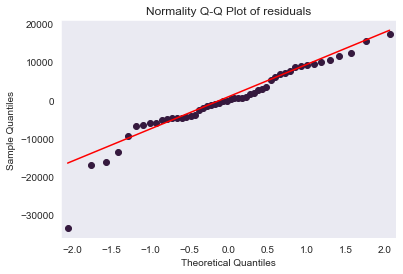

In [24]:
sm.qqplot(model.resid,line='q')
plt.title('Normality Q-Q Plot of residuals')
plt.show()

In [25]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Test for Homoscedasticity (plotting model's standardized fitted values vs standardized residual values) 

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()   # User defined z = (x - mu)/sigma

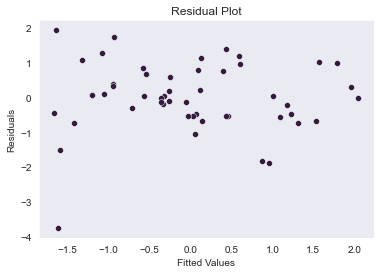

In [27]:
sns.scatterplot(get_standardized_values(model.fittedvalues),
               get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Residual Vs Regressors

### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
### using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


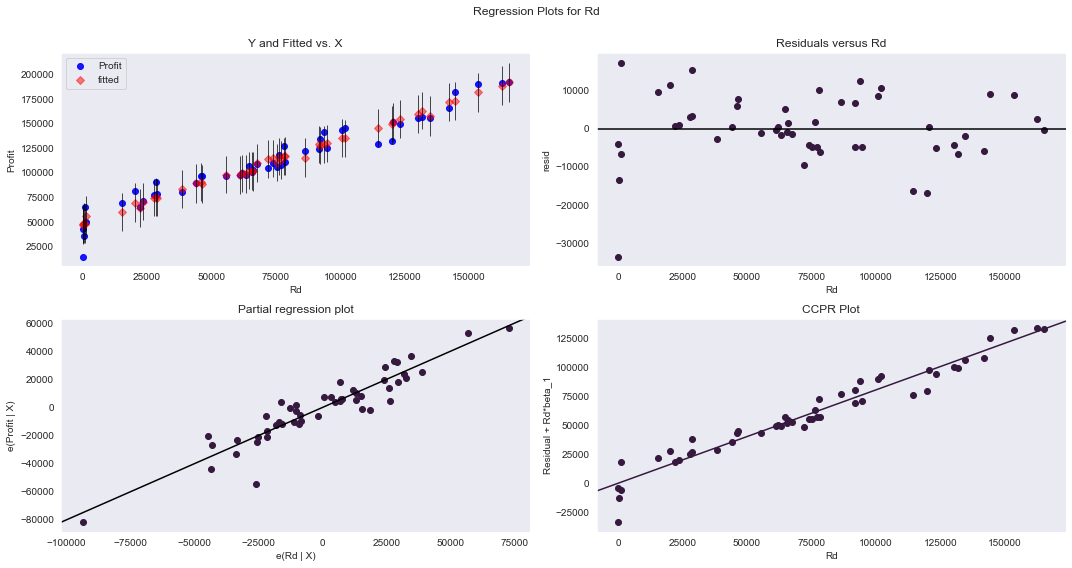

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Rd',fig=fig)
plt.show()

eval_env: 1


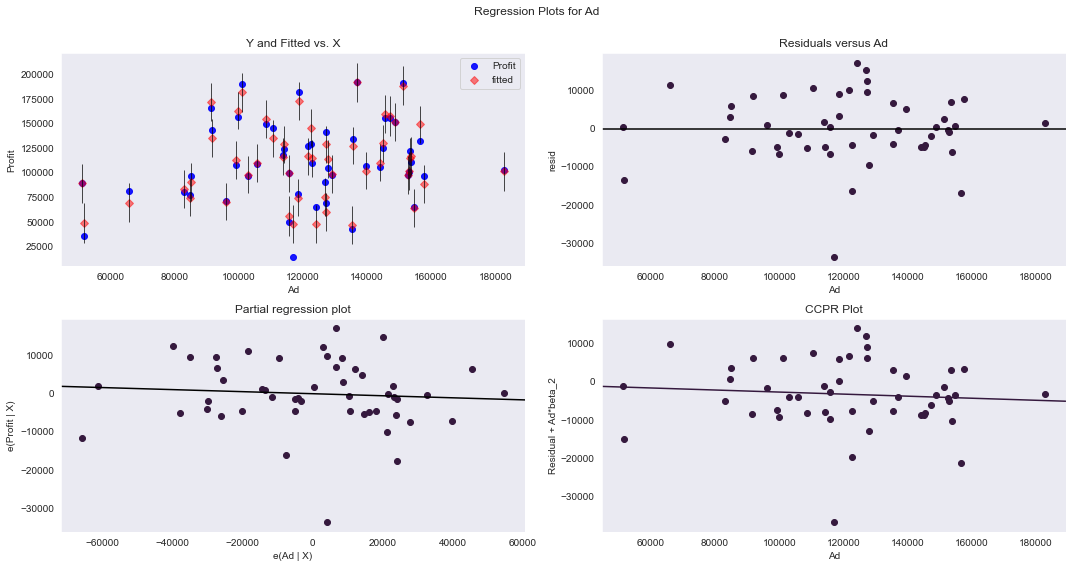

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Ad',fig=fig)
plt.show()

eval_env: 1


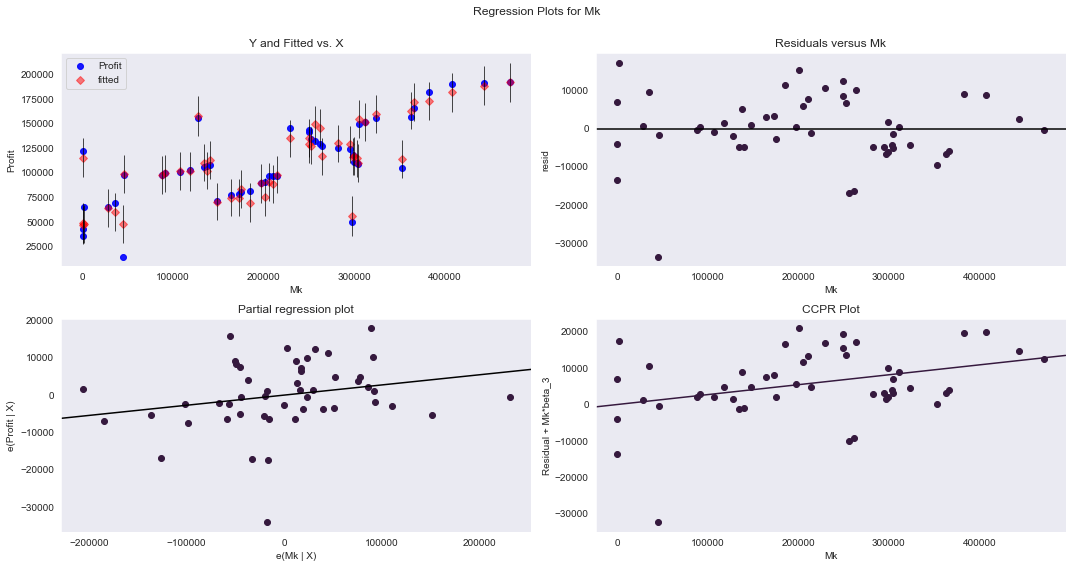

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Mk',fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [31]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

In [32]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [33]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

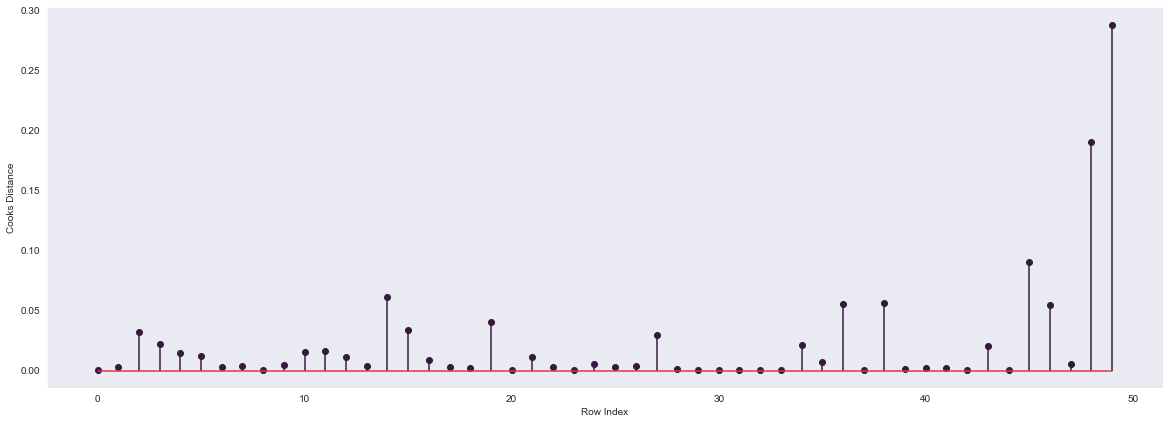

In [34]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

## High Influence points

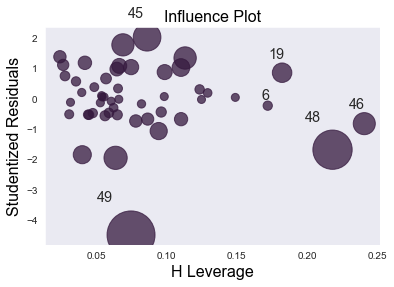

In [36]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [37]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = startup_data.shape[1]
n = startup_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [38]:
startup_data[startup_data.index.isin([49])]

,Rd,Ad,Mk,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the model:

In [39]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startup_data2=startup_data.drop(startup_data.index[[49]],axis=0).reset_index(drop=True)
startup_data2

,Rd,Ad,Mk,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Build the Final Model:

In [40]:
model2=smf.ols('Profit~Rd+Ad+Mk',data=startup_data2).fit()
model2

## Again Model Deletion Diagnostic:

In [41]:
model_influence_2=model2.get_influence()
(c_2,_)=model_influence_2.cooks_distance

In [42]:
c_2

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

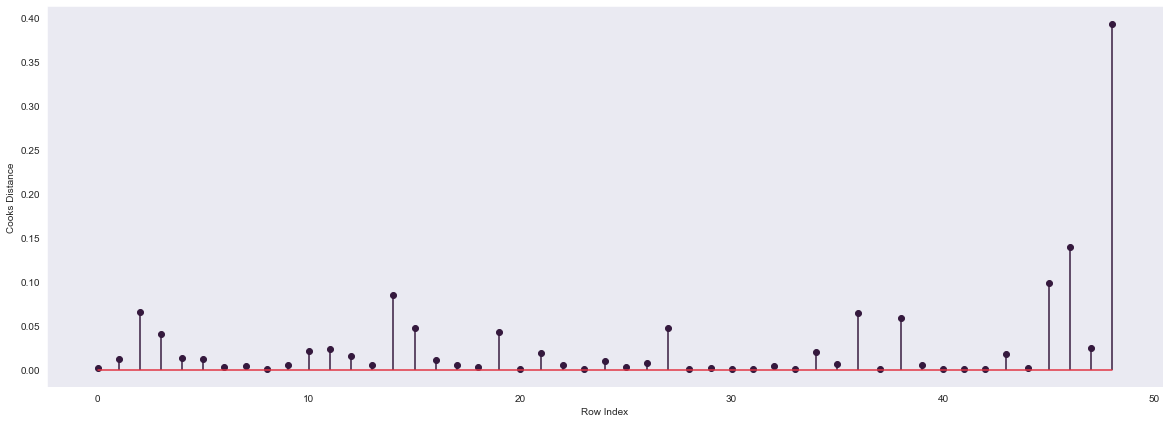

In [43]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data2)),np.round(c_2,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index of the data points where c is more than .5
(np.argmax(c_2),np.max(c_2))

(48, 0.39274420556321554)

#### Since,the value is <1,we stop the diagnostic process and finalize the model.

In [45]:
model2.rsquared,model2.aic

(0.9613162435129847, 1020.5652974526367)

### Predict for new data:

In [46]:
new_data=pd.DataFrame({'Rd':140000,'Ad': 150000,'Mk': 175000},index=[0])
new_data

,Rd,Ad,Mk
0,140000,150000,175000


In [47]:
model2.predict(new_data)

0    163088.380635
dtype: float64

In [48]:
pred_model2=model2.predict(startup_data2)
pred_model2

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## R-squared value Table of Different Models:

In [49]:
d1={'Linear Models':('model1','model2'),'R-squared values':(model.rsquared,model2.rsquared)}
d1

{'Linear Models': ('model1', 'model2'),
 'R-squared values': (0.9507459940683246, 0.9613162435129847)}

In [50]:
R_sq_table=pd.DataFrame(d1)
R_sq_table

,Linear Models,R-squared values
0,model1,0.950746
1,model2,0.961316


## ======================================================================= 